# Projection Onto A Simplex
* This notebook demonstrates the validity and the performance of the algorithm presented in (Chen and Ye, "Projection Onto A Simplex", 2011).
* Author: Sangwoong Yoon (sangwoong24yoon@gmail.com)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import sys
sys.path.append('../')
from src.projsplx import projsplx
plt.style.use('ggplot')

## 2D Projection Example

In [9]:
l_y = []
l_p = []
for _ in xrange(50):
    yy = np.random.randn(2)
    pp = projsplx(yy)
    l_y.append(yy)
    l_p.append(pp)
Y = np.vstack(l_y)
P = np.vstack(l_p)

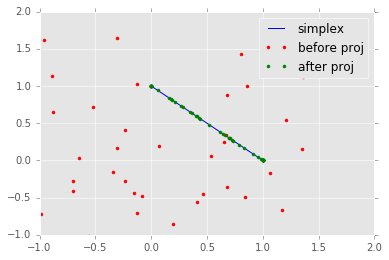

In [17]:
plt.plot([0,1],[1,0], 'b', label='simplex')
plt.xlim([-1,2])
plt.ylim([-1,2])
plt.plot(Y[:,0], Y[:,1], '.r', label='before proj')
plt.plot(P[:,0], P[:,1], '.g', label='after proj')
plt.legend(loc='best')